In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [11]:
df = pd.read_csv('US_Baby_Names.csv', dtype={"Id": str})
df.sample(5)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
957924,5296210,5296211,Mauricio,2014,M,VA,6
796621,4464245,4464246,Jeffrey,2004,M,RI,16
200118,1068203,1068204,Jolie,2011,F,FL,22
921367,5120347,5120348,Macee,2012,F,UT,5
42263,300580,300581,Kinsley,2007,F,AZ,5


In [10]:
df.shape

(1016395, 6)

ếu cột 'Unnamed: 0' là dư thừa, có thể là do có một cột chỉ mục không cần thiết được thêm vào khi đọc dữ liệu. 

In [16]:
df = df.drop(['Unnamed: 0'], axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [17]:
df.head()

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


In [19]:
df.State.value_counts().count()

51

In [22]:
# Đếm số bang xuất hiện trong cột 'State'
so_bang_xuat_hien = df['State'].nunique()

# Tạo một list chứa code của tất cả các bang xuất hiện
code_bang = df['State'].unique().tolist()

# In số bang xuất hiện và danh sách code của các bang
print("Số bang xuất hiện trong df_baby:", so_bang_xuat_hien)
print("Danh sách code của các bang xuất hiện trong df_baby:", code_bang)

Số bang xuất hiện trong df_baby: 51
Danh sách code của các bang xuất hiện trong df_baby: ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


In [23]:
df['Gender'].value_counts()

Gender
F    558846
M    457549
Name: count, dtype: int64

In [30]:
#  so61 be1 trai be1 gai  sinh 2010 d9en 2014
df_2010_2014 = df[(df['Year'] >= 2010) & (df['Year'] <= 2014)]
SINH_TAIL_il = df_2010_2014[df_2010_2014['State']=='IL']
SINH_TAIL_il.Gender.value_counts()


Gender
F    9501
M    7638
Name: count, dtype: int64

In [33]:
df.Name.nunique()

17632

In [51]:
data_tong_ten = df['Name'].value_counts()
print(data_tong_ten.nsmallest())

Name
Grettell    1
Dawsen      1
Abenezer    1
Greenley    1
Daiden      1
Name: count, dtype: int64


In [53]:
data_tong_ten = df['Name'].value_counts()
print(data_tong_ten.nlargest(5))

Name
Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Name: count, dtype: int64


In [68]:
df_2004_2011 = df[(df['Year'] >= 2004) & (df['Year'] <= 2011)]
df_2004_2011_NU = df_2004_2011[df_2004_2011['Gender']=='F']
# df_2004_2011_NU                                       
a = df_2004_2011_NU.groupby(['State']).size()
a.nlargest(1)

State
CA    33121
dtype: int64

<BarContainer object of 10 artists>

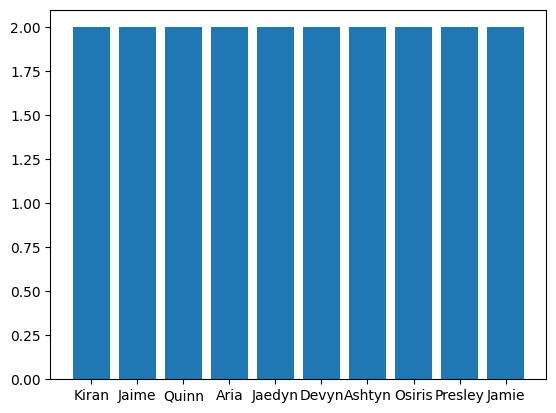

In [79]:
nam_2010 = df[(df['Year'] == 2010) & (df['State']=='CA')]
top_10= nam_2010.Name.value_counts().nlargest(10)
top_10
plt.bar(top_10.index, top_10.values)

<Axes: xlabel='Year,Gender'>

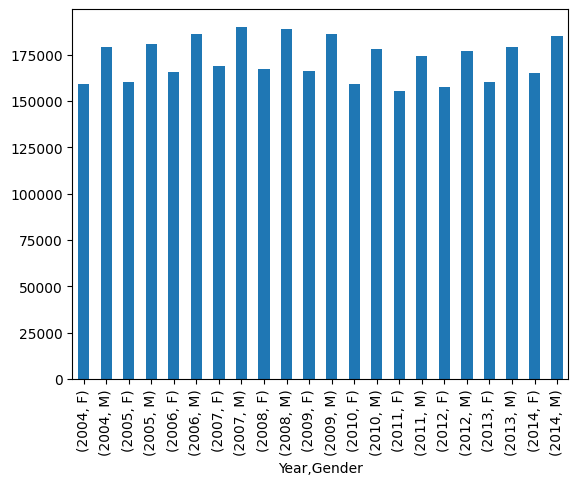

In [90]:
df_2004_2011_bang_TX = df[((df['Year'] >= 2004) & (df['Year'] <= 2014)) & (df['State']=='TX')]
df_2004_2011_bang_TX
gender_counts_by_year = df_2004_2011_bang_TX.groupby(['Year', 'Gender'])['Count'].sum()
gender_counts_by_year.plot(kind='bar', stacked=True)

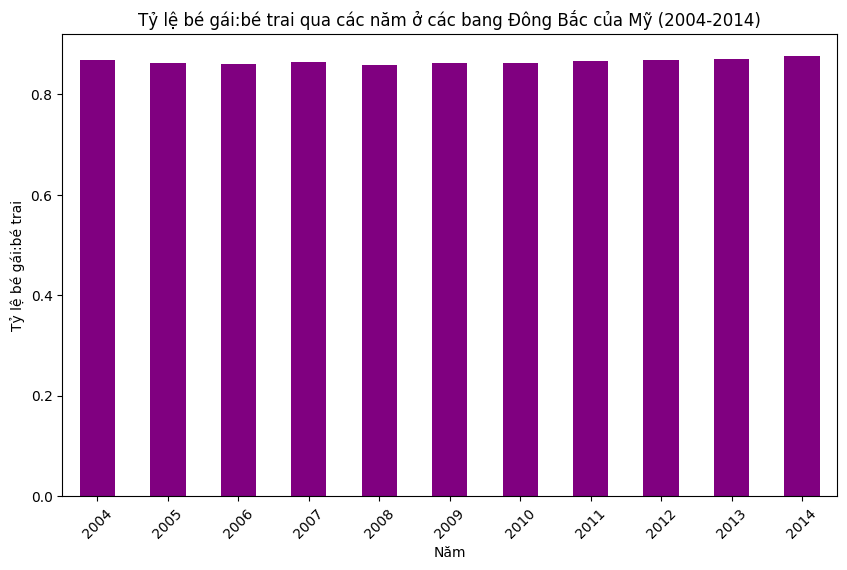

In [91]:
# Danh sách các bang Đông Bắc của Mỹ
northeast_states = ['CT', 'ME', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT']

# Lọc dữ liệu cho các bang Đông Bắc của Mỹ từ 2004 đến 2014
df_northeast = df[(df['State'].isin(northeast_states)) & (df['Year'].between(2004, 2014))]

# Nhóm dữ liệu theo năm và giới tính, sau đó đếm số lượng bé trai và bé gái sinh ra trong mỗi năm
gender_counts_by_year_state = df_northeast.groupby(['Year', 'Gender'])['Count'].sum().unstack()

# Tính tỷ lệ giữa số lượng bé gái và bé trai trong từng năm
gender_ratio_by_year_state = gender_counts_by_year_state['F'] / gender_counts_by_year_state['M']

# Vẽ biểu đồ bar chart thể hiện tỷ lệ giữa bé gái và bé trai qua các năm
plt.figure(figsize=(10, 6))
gender_ratio_by_year_state.plot(kind='bar', color='purple')
plt.title('Tỷ lệ bé gái:bé trai qua các năm ở các bang Đông Bắc của Mỹ (2004-2014)')
plt.xlabel('Năm')
plt.ylabel('Tỷ lệ bé gái:bé trai')
plt.xticks(rotation=45)
plt.show()
